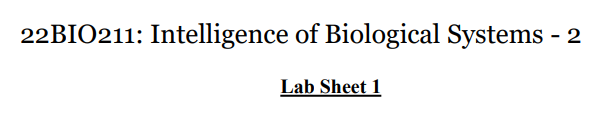

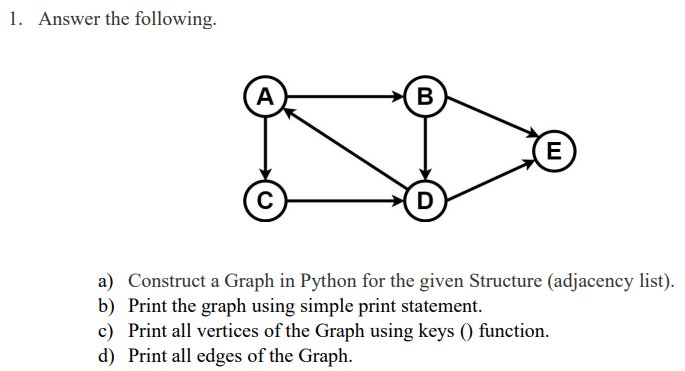

In [1]:
#1a
graph={"A":["B","C"], "B":["D","E"],"C":["D"], "D":["A","E"],"E":[]}

In [ ]:
#1b
print(graph)

{'A': ['B', 'C'], 'B': ['D', 'E'], 'C': ['D'], 'D': ['A', 'E'], 'E': []}


In [ ]:
#1c
print(list(graph.keys()))

['A', 'B', 'C', 'D', 'E']


In [ ]:
#1d
edges=[]
for node in graph:
  for neighbour in graph[node]:
    edges.append((node,neighbour))
print(edges)

[('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'D'), ('D', 'A'), ('D', 'E')]


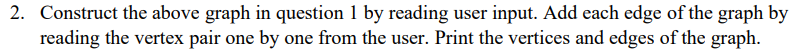

In [ ]:
#2
graph=dict()
def AddEdge(node1,node2):
 if node2 is not None:
  if node1 not in graph:
    graph[node1]=[]
  if node2 not in graph:
    graph[node2]=[]
  graph[node1].append(node2)
AddEdge('A','B')
AddEdge('A','C')
AddEdge('B','D')
AddEdge('B','E')
AddEdge('C','D')
AddEdge('D','A')
AddEdge('D','E')
AddEdge('E',None)
for key,val in graph.items():
    print(f"{key}-->{val}")


A-->['B', 'C']
B-->['D', 'E']
C-->['D']
D-->['A', 'E']
E-->[]


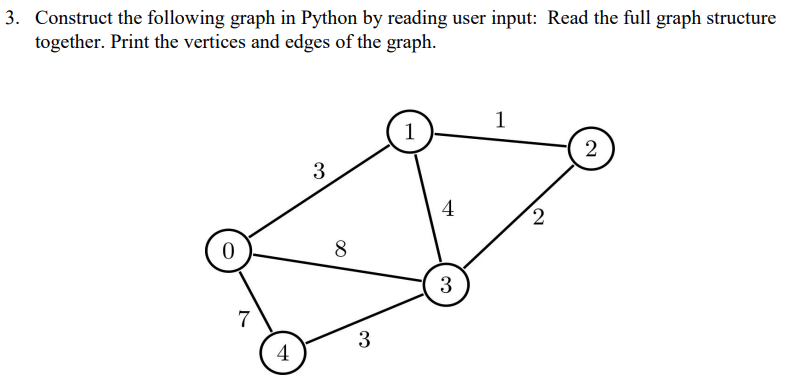

In [ ]:
#3
graph2=dict()
def AddEdge(node1,node2,cost):
 if node2 is not None:
  if node1 not in graph2:
    graph2[node1]=[]
  if node2 not in graph2:
    graph2[node2]=[]
  graph2[node1].append(node2)
print("Enter number of nodes and edges of the graph: ")
nodes,edges=input().split()
print("Enter each pair of nodes having an edge between them:")
for x in range(int(edges)):
  node1, node2,cost = input().split()
  AddEdge(node1, node2,cost)

Enter number of nodes and edges of the graph: 
5 7
Enter each pair of nodes having an edge between them:
0 1 3
0 3 8
0 4 7
1 2 1
1 3 4
2 3 2
3 4 3


In [ ]:
for key, val in graph2.items():
 print(f"{key}-->{val}")

0-->['1', '3', '4']
1-->['2', '3']
3-->['4']
4-->[]
2-->['3']


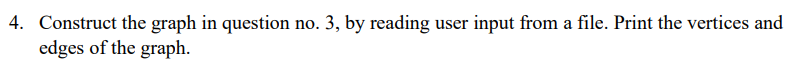

In [ ]:
#4
from google.colab import files
uploaded = files.upload()

Saving graph.txt to graph.txt


In [ ]:
graph3=dict()
def AddEdge(node1,node2,cost):
 if node2 is not None:
  if node1 not in graph3:
    graph3[node1]=[]
  if node2 not in graph3:
    graph3[node2]=[]
  graph3[node1].append(node2)
with open("graph.txt") as f:
  lines=f.readlines()
nodes, edges=lines[0].split()
for i in range(1, len(lines)):
 node1, node2,cost = lines[i].split()
 AddEdge(node1, node2,int(cost))
for key, val in graph3.items():
 print(f"{key}-->{val}")

0-->['1', '3', '4']
1-->['2', '3']
3-->['4']
4-->[]
2-->['3']


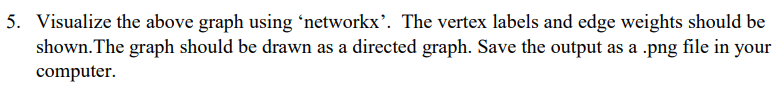

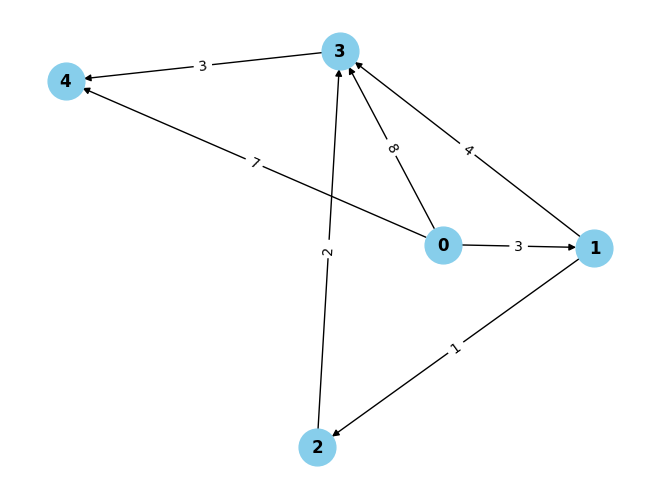

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
graph_data = [
    (0, 1, {'weight': 3}),
    (0, 3, {'weight': 8}),
    (0, 4, {'weight': 7}),
    (1, 2, {'weight': 1}),
    (1, 3, {'weight': 4}),
    (2, 3, {'weight': 2}),
    (3, 4, {'weight': 3})
]

G = nx.DiGraph()

G.add_edges_from(graph_data)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
edge_labels = {(i, j): w['weight'] for i, j, w in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.savefig("directed_graph.png", format="PNG")
plt.show()


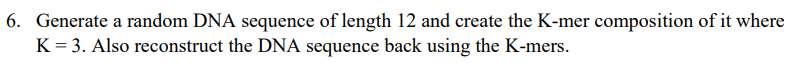

In [ ]:
#dbt-normal or using overlap concept
import random

def generate_random_sequence(length):
    bases = ['A', 'T', 'C', 'G']
    return ''.join(random.choice(bases) for _ in range(length))

def kmer_composition(sequence, k):
    kmers = [sequence[i:i+k] for i in range(len(sequence) - k + 1)]
    return kmers

def reconstruct_sequence(kmers, k):
    reconstructed_seq = kmers[0]
    for kmer in kmers[1:]:
        reconstructed_seq += kmer[-1]
    return reconstructed_seq

# Generate a random DNA sequence of length 12
dna_sequence = generate_random_sequence(12)
print("Random DNA sequence:", dna_sequence)

# Define K
K = 3

# Create K-mer composition of the DNA sequence
kmers = kmer_composition(dna_sequence, K)
print("K-mer composition (K = {}):".format(K), kmers)

# Reconstruct DNA sequence from K-mers
reconstructed_sequence = reconstruct_sequence(kmers, K)
print("Reconstructed DNA sequence:", reconstructed_sequence)



Random DNA sequence: TGAGCGTGTCGG
K-mer composition (K = 3): ['TGA', 'GAG', 'AGC', 'GCG', 'CGT', 'GTG', 'TGT', 'GTC', 'TCG', 'CGG']
Reconstructed DNA sequence: TGAGCGTGTCGG


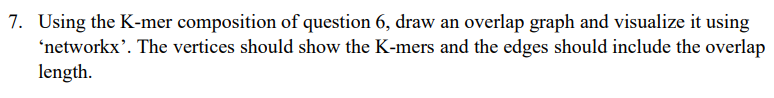

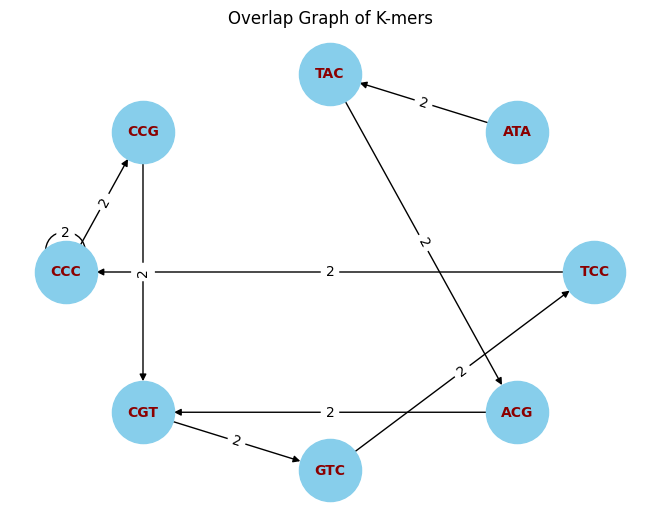

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_random_dna(length):
    import random
    return ''.join(random.choice('ACGT') for _ in range(length))

def get_kmers(sequence, k):
    return [sequence[i:i+k] for i in range(len(sequence) - k + 1)]

def create_overlap_graph(kmers, k):
    G = nx.DiGraph()  # Directed graph to represent overlaps
    for kmer in set(kmers):  # Add nodes for each unique k-mer
        G.add_node(kmer)

    # Add directed edges with labels that denote the overlap length
    for i in range(len(kmers) - 1):
        if kmers[i][1:] == kmers[i+1][:k-1]:
            G.add_edge(kmers[i], kmers[i+1], weight=k-1)

    return G

def draw_graph(G):
    pos = nx.circular_layout(G)     # Position nodes using the circular layout
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='k', node_size=2000, font_size=10, font_color='darkred', font_weight='bold', arrowstyle='-|>', arrowsize=10)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Overlap Graph of K-mers")
    plt.show()

dna_length = 12
k = 3

dna_sequence = generate_random_dna(dna_length)
kmers = get_kmers(dna_sequence, k)

overlap_graph = create_overlap_graph(kmers, k)
draw_graph(overlap_graph)
